# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
!pip install citipy
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{city}&appid={weather_api_key}'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url+city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']-270
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        
        t = time.localtime(city_weather['dt'])
        t.tm_year
        t.tm_mon
        t.tm_yday
        # date = f'{t.tm_year}-{t.tm_mon}-{t.tm_yday}'
        city_date = f'{t.tm_year}-{t.tm_mon}-{t.tm_yday}'

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kuqa
Processing Record 2 of Set 1 | namibe
Processing Record 3 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 4 of Set 1 | opuwo
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | wenchang
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | ust'-kulom
Processing Record 9 of Set 1 | kingston
Processing Record 10 of Set 1 | kearney
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | kachkanar
Processing Record 14 of Set 1 | chonchi
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | pilar do sul
Processing Record 17 of Set 1 | devinuwara
City not found. Skipping...
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | stanley
Processing Record 21 of Set 1 | dongning
Processing Record 2

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kuqa,41.7278,82.9364,-3.48,68,3,1.49,CN,2025-1-9
1,namibe,-15.1961,12.1522,22.91,86,7,1.22,AO,2025-1-9
2,opuwo,-18.0607,13.8400,23.38,46,87,1.37,NA,2025-1-9
3,puerto ayora,-0.7393,-90.3518,27.34,96,79,0.89,EC,2025-1-9
4,wenchang,30.9040,118.4887,7.59,23,0,2.00,CN,2025-1-9


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv('../output_data/cities.csv', index_col="City_ID")
#/Users/lauraleecallahan/Desktop/python-api-challenge/python-api-challenge/output_data/cities.csv
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kuqa,41.7278,82.9364,-3.48,68,3,1.49,CN,2025-1-9
1,namibe,-15.1961,12.1522,22.91,86,7,1.22,AO,2025-1-9
2,opuwo,-18.0607,13.8400,23.38,46,87,1.37,NaN,2025-1-9
3,puerto ayora,-0.7393,-90.3518,27.34,96,79,0.89,EC,2025-1-9
4,wenchang,30.9040,118.4887,7.59,23,0,2.00,CN,2025-1-9


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [9]:
#add date to title

t = time.localtime()
t.tm_year
t.tm_mon
t.tm_yday
date = f'{t.tm_year}-{t.tm_mon}-{t.tm_yday}'
date = city_data_df['Date'][0]

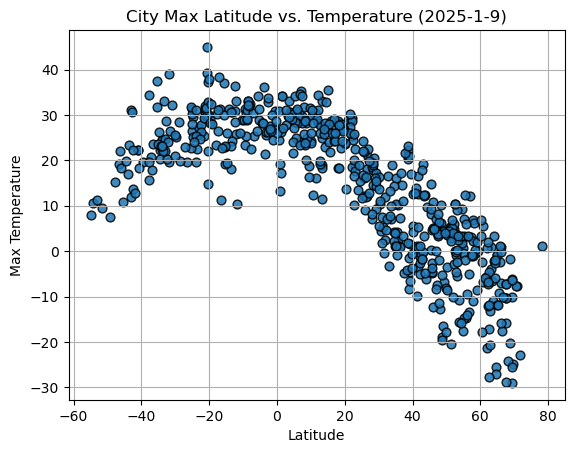

In [10]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x='Lat', y='Max Temp', s=40, edgecolors='black', alpha=.86)
# plt.plot(marker='o',markerfacecolor='w', markeredgewidth=10.5, markeredgecolor=('black'))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title(f'City Max Latitude vs. Temperature ({date})')
plt.grid(visible=True)


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

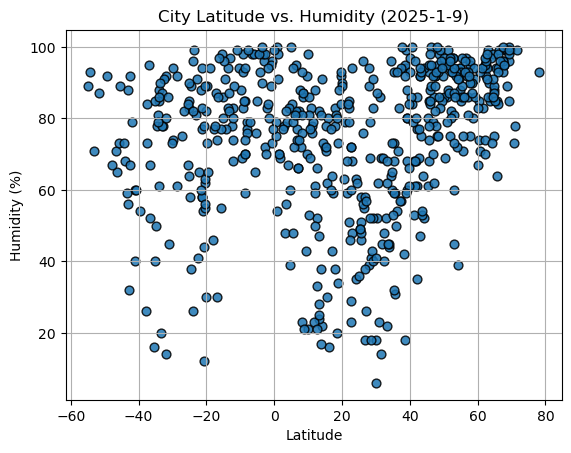

In [11]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x='Lat', y='Humidity', s=40, edgecolors='black', alpha=.86)
# plt.plot(marker='o',markerfacecolor='w', markeredgewidth=10.5, markeredgecolor=('black'))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({date})')
plt.grid(visible=True)


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

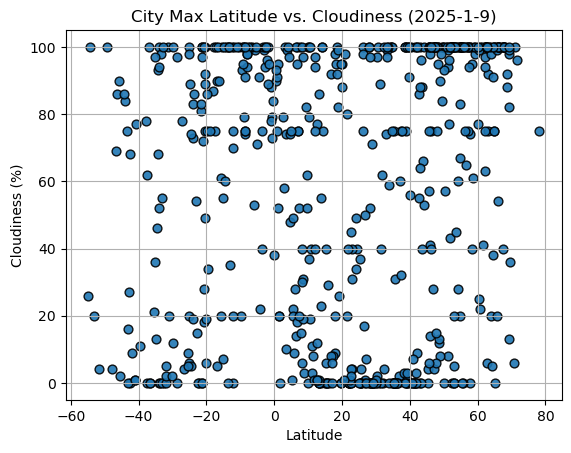

In [12]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x='Lat', y='Cloudiness', s=40, edgecolors='black', alpha=.90)
# plt.plot(marker='o',markerfacecolor='w', markeredgewidth=10.5, markeredgecolor=('black'))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Max Latitude vs. Cloudiness ({date})')
plt.grid(visible=True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

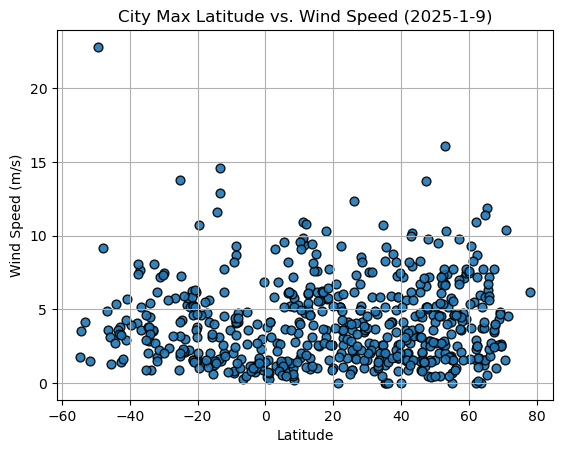

In [13]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x='Lat', y='Wind Speed', s=40, edgecolors='black', alpha=.90)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Max Latitude vs. Wind Speed ({date})')
plt.grid(visible=True)


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def lin_reg(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = (x * slope) + intercept
    return regress_values, slope, intercept, rvalue

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kuqa,41.7278,82.9364,-3.48,68,3,1.49,CN,2025-1-9
4,wenchang,30.9040,118.4887,7.59,23,0,2.00,CN,2025-1-9
6,ust'-kulom,61.6864,53.6902,-5.60,83,41,5.50,RU,2025-1-9
7,kingston,17.9970,-76.7936,28.68,83,20,3.60,JM,2025-1-9
8,kearney,40.6995,-99.0815,0.55,84,0,7.20,US,2025-1-9


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,namibe,-15.1961,12.1522,22.91,86,7,1.22,AO,2025-1-9
2,opuwo,-18.0607,13.8400,23.38,46,87,1.37,NaN,2025-1-9
3,puerto ayora,-0.7393,-90.3518,27.34,96,79,0.89,EC,2025-1-9
5,waitangi,-43.9535,-176.5597,16.94,68,84,5.36,NZ,2025-1-9
10,ushuaia,-54.8000,-68.3000,7.97,89,26,1.76,AR,2025-1-9


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8606961269587691


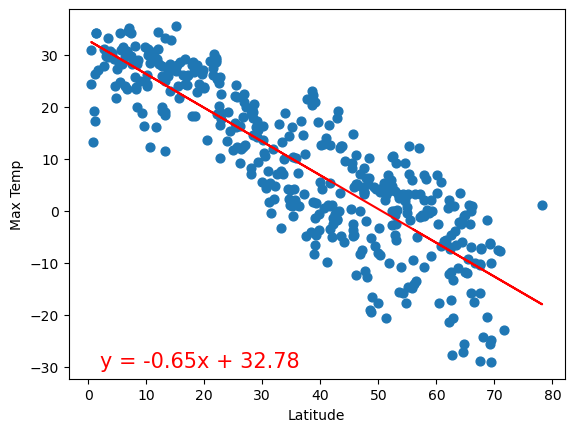

In [17]:
# Linear regression on Northern Hemisphere
northern_hemi_df.plot.scatter(x='Lat', y='Max Temp', s=40)

x=northern_hemi_df['Lat']
y=northern_hemi_df['Max Temp']
(regress_values, slope, intercept, rvalue) = lin_reg(x,y)

slope = '%.2f'%slope
intercept = '%.2f'%intercept
plt.text(2, -30, f'y = {slope}x + {intercept}', fontsize = 15, color='red')

print(f'The r-value is: {rvalue}')

plt.plot(x,regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

The r-value is: 0.5089341539930765


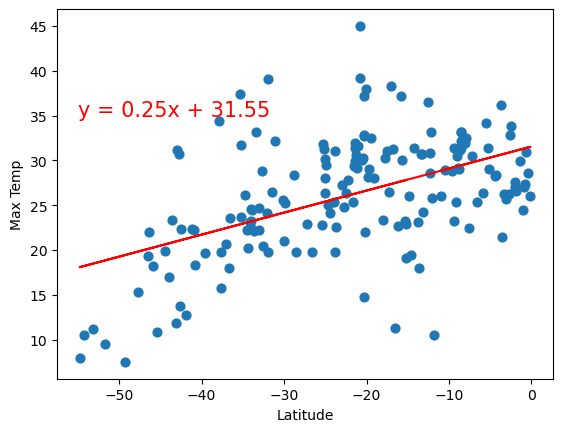

In [18]:
# Linear regression on Southern Hemisphere
southern_hemi_df.plot.scatter(x='Lat', y='Max Temp', s=40)

x=southern_hemi_df['Lat']
y=southern_hemi_df['Max Temp']
(regress_values, slope, intercept, rvalue) = lin_reg(x,y)
plt.plot(x,regress_values, 'r-')


slope = '%.2f'%slope
intercept = '%.2f'%intercept
plt.text(-55, 35, f'y = {slope}x + {intercept}', fontsize = 15, color='red')

print(f'The r-value is: {rvalue}')

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** There is a linear correlation between your proximity to the equator and the max temperature of a region. The farther you move away from the equator the colder it can potentially get.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.007659599322853922


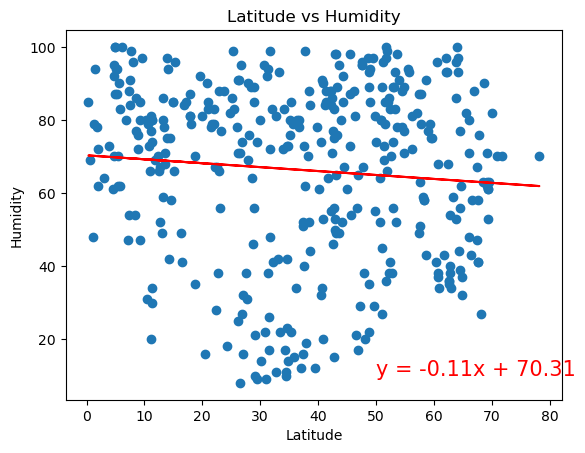

In [17]:
# Northern Hemisphere
northern_hemi_df.plot.scatter(x='Lat', y='Humidity', s=40)

x=northern_hemi_df['Lat']
y=northern_hemi_df['Humidity']
(regress_values, slope, intercept, rvalue) = lin_reg(x,y)
plt.plot(x,regress_values, 'r-')

slope = '%.2f'%slope
intercept = '%.2f'%intercept
plt.text(41, 10, f'y = {slope}x + {intercept}', fontsize = 15, color='red')

print(f'The r-value is: {rvalue}')

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-value is: 0.28290898758084876


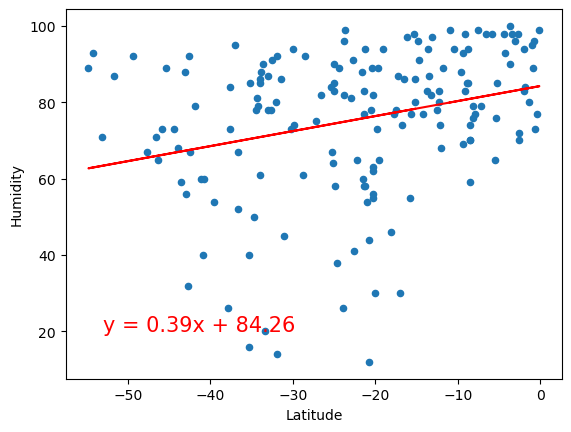

In [19]:
# Southern Hemisphere
southern_hemi_df.plot.scatter(x='Lat', y='Humidity')

x=southern_hemi_df['Lat']
y=southern_hemi_df['Humidity']
(regress_values, slope, intercept, rvalue) = lin_reg(x,y)
plt.plot(x,regress_values, 'r-')

slope = '%.2f'%slope
intercept = '%.2f'%intercept
plt.text(-53, 20, f'y = {slope}x + {intercept}', fontsize = 15, color='red')

print(f'The r-value is: {rvalue}')

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** Humidity increases with latitude. Northern hemisphere locations experience higher levels of humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3078032063935635


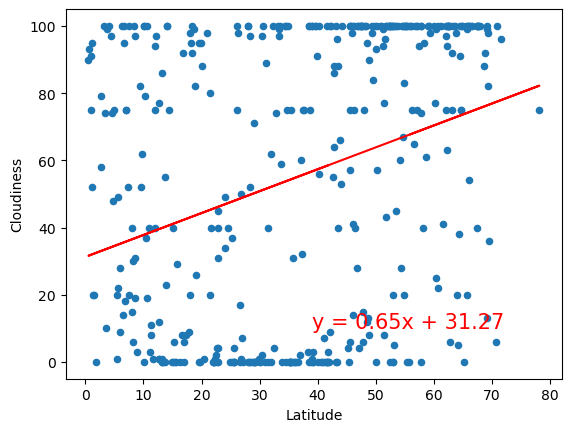

In [20]:
# Northern Hemisphere
northern_hemi_df.plot.scatter(x='Lat', y='Cloudiness')

x=northern_hemi_df['Lat']
y=northern_hemi_df['Cloudiness']
(regress_values, slope, intercept, rvalue) = lin_reg(x,y)
plt.plot(x,regress_values, 'r-')

slope = '%.2f'%slope
intercept = '%.2f'%intercept
plt.text(39, 10, f'y = {slope}x + {intercept}', fontsize = 15, color='red')

print(f'The r-value is: {rvalue}')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r^2-value is: 0.018616831531634456


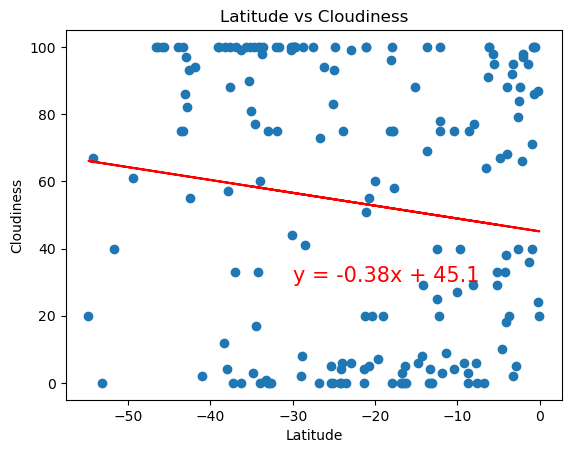

In [20]:
# Southern Hemisphere
southern_hemi_df.plot.scatter(x='Lat', y='Cloudiness', s=40)

x=southern_hemi_df['Lat']
y=southern_hemi_df['Cloudiness']
(regress_values, slope, intercept, rvalue) = lin_reg(x,y)
plt.plot(x,regress_values, 'r-')

slope = '%.2f'%slope
intercept = '%.2f'%intercept
plt.text(-25, 22, f'y = {slope}x + {intercept}', fontsize = 15, color='red')

print(f'The r-value is: {rvalue}')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** Cloudiness increases with latitude. Similar to humidity.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.04306054274923207


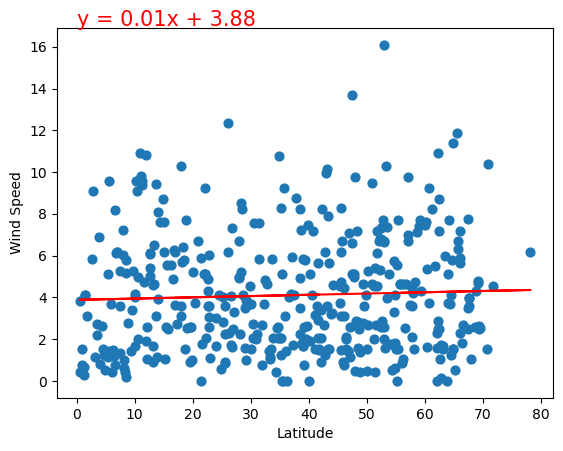

In [21]:
# Northern Hemisphere
northern_hemi_df.plot.scatter(x='Lat', y='Wind Speed', s=40)

x=northern_hemi_df['Lat']
y=northern_hemi_df['Wind Speed']
(regress_values, slope, intercept, rvalue) = lin_reg(x,y)
plt.plot(x,regress_values, 'r-')

slope = '%.2f'%slope
intercept = '%.2f'%intercept
plt.text(0, 17, f'y = {slope}x + {intercept}', fontsize = 15, color='red')

print(f'The r-value is: {rvalue}')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-value is: -0.1951508105564074


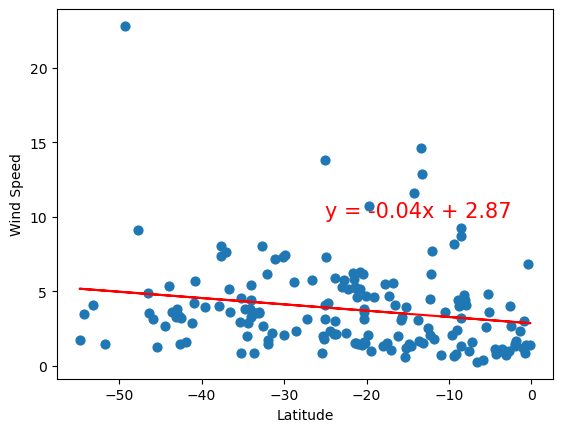

In [22]:
# Southern Hemisphere
southern_hemi_df.plot.scatter(x='Lat', y='Wind Speed', s=40)

x=southern_hemi_df['Lat']
y=southern_hemi_df['Wind Speed']
(regress_values, slope, intercept, rvalue) = lin_reg(x,y)
plt.plot(x,regress_values, 'r-')

slope = '%.2f'%slope
intercept = '%.2f'%intercept
plt.text(-25, 10, f'y = {slope}x + {intercept}', fontsize = 15, color='red')

print(f'The r-value is: {rvalue}')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** The farther you move away from the equator, the higher the wind speed.